# Chapter6: 近似解法と発見的解法

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 6.1
(問) 最小木問題の最適解を利用した巡回セールスマン問題の近似解法を考える.重み付き無向グラフ$G(V, E, c)$が与えられている.ただし, 任意の2点間には辺が存在し, 辺の重みは正で三角不等式を満たす. 図6.13(a)は6つの点からなるグラフ$G$の例であり, 各辺の重みはその端点間のユークリッド距離でさだめられている. 近似解としては, まず$G$の最小木を求める. 次に最小木の各辺を2本ずつにし, それぞれに異なる向きをつける. そして, この向きのついた辺をすべてたどる経路を考える. この経路ですでに一度訪れた点はスキップすることにすると, 巡回路が得られる. この巡回路が巡回セールスマン問題の近似解になっている.

(答) 

(i)図6.13(a)のグラフにおいて, 点$v_5$を始点にした場合はどのような近似解が得られるか

$v_5 \rightarrow v_6 \rightarrow v_3 \rightarrow v_2 \rightarrow v_4 \rightarrow v_1 \rightarrow v_5$

(ii)この解法が2-近似解法であることを示せ

最適解の巡回路の長さを$\bar{f}$, 近似解の巡回路の長さを$f^{\star}$とおく. 最小全域木における辺の長さの和を$m$とおくと「最小木の各辺を2本ずつにし, それぞれに異なる向きをつけ, それらすべてたどる経路」の辺の和は$2m$となる. アルゴリズムの構成と三角不等式より$f^{\star} \le 2m$が成り立つ. 最小全域木と巡回路の定義より$m < \bar{f}$なので$f^{\star} \le 2\bar{f}$が成り立つ.


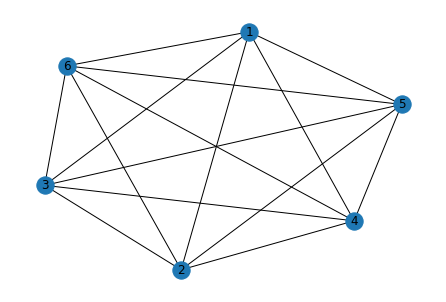

In [3]:
n = 6
G = nx.complete_graph(n)
pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, labels = dict(zip(range(n), range(1, n+1))))
plt.show()

## 6.2

(問) 無向グラフ$G(V, E)$が与えられたとき, カット$(S, V-S)$含まれる辺の数が最大になるような$V$の部分集合$S$を求める問題を, 最大カット問題とよぶ. 次の問に答えよ.

(i)最大カット問題に対して次の局所探索法を考える. まず, $V$からランダムにいくつかの点を選んで$S$とする.次に$V-S$に属する点のうち, それを$S$に移すことでカットの本数が増える点をSに移す. また, 同様に$S$に属する点のうち, それを$V-S$に移すことでカットの本数が増える点を$V-S$に移す.このような操作を$S$が更新されなくなるまで繰り返す.この局所探索法は最大カット問題の0.5-近似解法であることを示せ.

(ii)最大カット問題に対して, 劣モジュラ最大化に基づく貪欲算法を設計せよ

(答) 

(i) 局所探索法による近似解を$f^{\star}$, 最適解を$\bar{f}$とする. 近似解の状態で$S$内のすべての点について, アルゴリズムの構成から$$(\text{もう一方の端点が}S\text{内に存在する辺の本数}) \le \text{(もう一方の端点が}V-S\text{内に存在する辺の本数})$$が成り立つ. 両辺の和を$S$内の各点について取ることで, $S$に端点のある辺のうちもう一方が$S$に含まれる辺の本数を$e_{s}$とおくと, $2e_{s} \le f^{\star}$を得ることができる. 同様に$V-S$内に端点のある辺のうちもう一方が$V-S$に含まれる辺の本数を$e_{v}$とおいて$2e_{v} \le f^{\star}$が成り立つ. よって
$\begin{aligned}
 2e_{s} + 2e_{v} &\le 2f^{\star} \Leftrightarrow \\  2e_{s} + 2e_{v} + 2f^{\star} &\le 4f^{\star}  \Leftrightarrow \\  2|E| &\le 4f^{\star} \Leftrightarrow \\  \bar{f} &\le 2f^{\star}\end{aligned}$
$e_{s} + e_{v} + f^{\star} = |E|$と$\bar{f} \le |E|$利用した.

In [24]:
# (ii)
N = 7
M = 10
example = '''1 2
1 4
2 3
2 4
2 6
3 4
3 5
5 6
5 7
6 7'''

G = [[] for _ in range(N)]
input = example.split('\n')
for i in range(M):
    a, b = map(int, input[i].split())
    a -= 1
    b -= 1
    G[a].append(b)
    G[b].append(a)
G

[[1, 3], [0, 2, 3, 5], [1, 3, 4], [0, 1, 2], [2, 5, 6], [1, 4, 6], [4, 5]]

In [28]:
def main(G, N):
    # define init point
    init = np.random.choice(range(N))
    S = set([init])
    V = set(range(N))
    V.remove(init)
    print('init:', init)

    # search argmax f(S | j) while it keeps increasing
    while True:
        temp_max = 0
        j = -1
        for i in V:
            f = 0
            for v in G[i]:
                if v in V:
                    f += 1
                if v in S:
                    f -= 1
            j = i if f > temp_max else j
            temp_max = max(temp_max, f)
        if j >= 0:
            print('add', j)
            S.add(j)
            V.remove(j)
        else:
            break
    
    # check how many cuts there are
    cut = []
    for u, edge in enumerate(G):
        for v in edge:
            if u in S and v in V:
                cut.append([u, v]) 
    
    # output
    print('S:', S)
    print('V:', V)
    print('cut:', cut)

    return S

S = main(G, N)

init: 4
add 1
add 3
S: {1, 3, 4}
V: {0, 2, 5, 6}
cut: [[1, 0], [1, 2], [1, 5], [3, 0], [3, 2], [4, 2], [4, 5], [4, 6]]


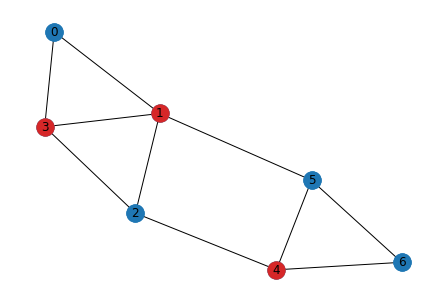

In [33]:
# plot example graph
Graph = nx.Graph()
for v, dest in enumerate(G):
    Graph.add_node(v, label = f'{v}', group = 'S' if v in S else 'V')
    for u in dest:
        Graph.add_edge(v, u)

pos = nx.spring_layout(Graph)
nx.draw(Graph, pos)
nx.draw_networkx_nodes(Graph, pos, nodelist=S, node_color="tab:red")
nx.draw_networkx_nodes(Graph, pos, nodelist=set(range(N)).difference(S), node_color="tab:blue")
nx.draw_networkx_labels(Graph, pos)
plt.show()

In [27]:
Graph.nodes

NodeView((0, 1, 3, 2, 5, 4, 6))

## 6.3
(問) データ点の集合$V = \{\bm{s}_{1}, \dots, \bm{s}_{m}\}$から$k$点を選び, それらをクラスター中心と呼ぶ. そして, 各データ点を最も近いクラスター中心に割り当てることで, クラスター$C_{1},\dots, C_{k}$を構成する. 各クラスターの大きさを, クラスター中心からそのクラスターの属する点までの距離の最大値で定義する. このとき, クラスターのうちで大きさが最大のものに着目し, その大きさができるだけ小さくなるクラスタリングを求めたい. つまり, $k$のクラスター中心の集合$U(\subset V)$のうち$$\max\{\rho(\bm{s}_{l}, U)|\bm{s}_{l}\in V\}$$の値を最小化するものを求める最適化問題を考える. ただし, $$\rho(\bm{s}_{l}, U)=\min\{\rho(\bm{s}_{l}, \bm{s}_{h}) | \bm{s}_{h} \in U\}$$この問題はk-センター問題と呼ばれている.次の問に答えよ.

(答)

(i)最遠点クラスタリング法により, k-センター問題の2-近似解が得られることを示せ.

最遠点クラスタリング法の目的関数値は$k$個の中心点からなる集合$\{\bm{s}_{1}, \dots, \bm{s}_{k}\}$から最も遠い点との距離であり, これを$\delta^{\star}$とする. アルゴリズムの構成から$k$個の中心点の互いの距離は$\delta^{\star}$以上である.  最適値を$\bar{\delta}$として, $\bar{\delta} < \delta^{\star}$のとき, 最適解では最遠点クラスタリング法での中心点の少なくとも2つが同じクラスターに含まれる. このクラスターにおける中心点とそれぞれの点の3点で考えると三角不等式よりこのクラスタの大きさは$\frac{\delta^{\star}}{2}$以上である. よって$\frac{\delta^{\star}}{2}\le \bar{\delta}$ より, $\delta^{\star} \le 2\bar{\delta}$が示される.


(ii)最遠点クラスタリング法で得られる解の目的関数値が, k-センター問題の最適値のちょうど2倍になるようなデータの例をあげよ

数直線上の$0, \frac{1}{4}, \frac{1}{2}, \frac{3}{4}, 1$の5点での2-センター問題を考える.

最適値は$\{\frac{1}{4}, \frac{3}{4}\}$を中心としたときの$\frac{1}{4}$であるが, 最遠点クラスタリング法で初期値を$0$に取った場合, $\{0, 1\}$の2点が中心点として選ばれ, 近似解は$\frac{1}{2}$となる.

 

## 6.4
(問) 無向グラフ$G=(V, E)$に関して, 次の問に答えよ. 

(答) 

(i) 点集合$S\subseteq V$に属する点を端点とする辺の数を$f(S)$で表すとき$f$が劣モジュラ関数であることを示せ.

任意の$j\in V-S$について$f(S\cup j) - f(S)=\ ${$j$を端点とする辺のうちもう一方の端点が$S$に含まれない辺の本数}となるので, 
$S \subset S^{\prime} \subset V$ を満たす点集合$S^{\prime}$と任意の$j\in V-S^{\prime}$について$f(S\cup j) - f(S)\ge f(S^{\prime}\cup j) - f(S^{\prime})$が成り立つ.

(ii)辺集合$T \subseteq E$に属する辺の端点である点の数を$g(T)$で表すとき, $g$が劣モジュラ関数であることを示せ.

任意の$j\in V-T$について$f(T\cup j) - f(T)=\ ${$j$の端点のうち$T$のどの辺の端点にも含まれない点の数}となるので, 
$T \subset T^{\prime} \subset E$ を満たす辺集合$T^{\prime}$と任意の$j\in E-T^{\prime}$について$f(T\cup j) - f(T)\ge f(T^{\prime}\cup j) - f(T^{\prime})$が成り立つ.

